## Figure Assessing bioinformatics software annotations: bio.tools case-study

### Figure 2 : Distribution of the number of tools in bio.tools according to number of topics and operation.

In [1]:
#Import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load dataframes
dfTool_NT = pd.read_csv("../Dataframes/dfTool_NoTransitive.tsv.bz2", sep="\t")#All tool with the number of Topics and Operations directly assigned
dfTool_T = pd.read_csv("../Dataframes/dfTool_Transitive.tsv.bz2", sep="\t")#All tools with the number of Topics and Operations inferred by inheritance. 

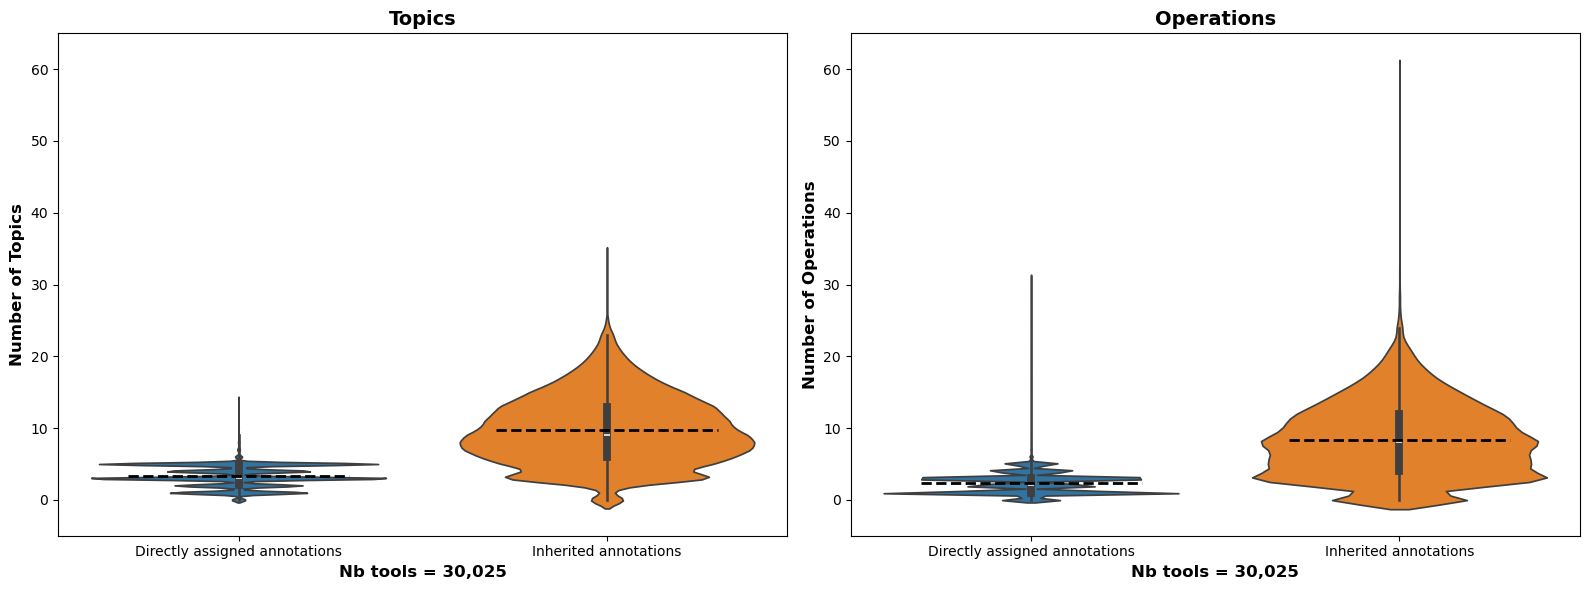

In [3]:
# Add a 'Heritage' column to each dataframe
dfTool_NT['Heritage'] = "Directly assigned annotations"
dfTool_T['Heritage'] = "Inherited annotations"

# Define a color palette
custom_palette = {
    "Directly assigned annotations": "#1f77b4", # Blue
    "Inherited annotations": "#ff7f0e", # Orange
}

# Combine the dataframes into one
df_combined = pd.concat([dfTool_NT, dfTool_T], ignore_index=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Violin plot for Topics
sns.violinplot(x="Heritage", y="nbTopics", data=df_combined, 
               hue="Heritage", palette=custom_palette, ax=axes[0], legend=False)
axes[0].set_xlabel("Nb tools = 30,025", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Number of Topics", fontsize=12, fontweight='bold')
axes[0].set_title("Topics", fontsize=14, fontweight='bold')
axes[0].set_ylim(-5, 65) #Define the y-axis to be identical in both plots. 

# Add mean and quartile lines for nbTopics
for i, condition in enumerate(df_combined['Heritage'].unique()):
    # Calculate the mean
    subset = df_combined[df_combined['Heritage'] == condition]
    mean_val = subset['nbTopics'].mean()
    # Plot the mean as a horizontal line across the violin plot
    axes[0].hlines(mean_val, i-0.3, i+0.3, color='black', linestyle='--', 
                   linewidth=2, label='Mean')

# Violin plot for Operations
sns.violinplot(x="Heritage", y="nbOperations", data=df_combined, 
               hue="Heritage", palette=custom_palette, ax=axes[1], legend=False)
axes[1].set_xlabel("Nb tools = 30,025", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Number of Operations", fontsize=12, fontweight='bold')
axes[1].set_title("Operations", fontsize=14, fontweight='bold')
axes[1].set_ylim(-5, 65) #Define the y-axis to be identical in both plots.

# Add mean and quartile lines for nbOperations
for i, condition in enumerate(df_combined['Heritage'].unique()):
    # Calculate the mean
    subset = df_combined[df_combined['Heritage'] == condition]
    mean_val = subset['nbOperations'].mean()
    # Plot the mean as a horizontal line across the violin plot
    axes[1].hlines(mean_val, i-0.3, i+0.3, color='black', linestyle='--',
                   linewidth=2, label='Mean')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()